In [1]:
%matplotlib inline

In [2]:
from analysis.lib.sim.NVpop_monteCarlo import monteCarlo_repumping as mcr; reload(mcr)

<module 'analysis.lib.sim.NVpop_monteCarlo.monteCarlo_repumping' from 'analysis/lib/sim/NVpop_monteCarlo/monteCarlo_repumping.pyc'>

## Single cycle

Final pops before decay from singlet:  [ 0.042  0.61   0.23   0.118  0.     0.   ]
Final pops after decay from singlet:  [ 0.054  0.622  0.324  0.     0.     0.   ]


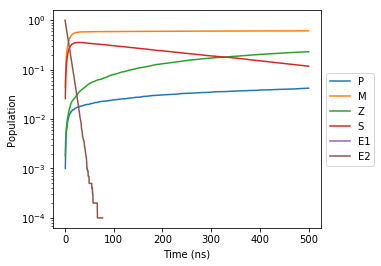

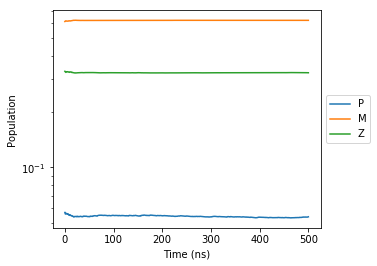

In [31]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.drive = 0
rmc.init_state = 5
rmc.S_lifetime = 400.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([1.0,0.00,0.0,0.63,0.0,0.0])
E2_branching_raw = np.array([0.03,0.936,0.034,0.63,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 11.7/np.sum(E1_branching_raw)
rmc.E2_lifetime = 11.7/np.sum(E2_branching_raw)
rmc.S_branching = mcr.normalized([1,1,8,0,0,0])

rmc.time_duration = 500
rmc.dt = 0.5
rmc.repetitions = 10000
rmc.run(print_end_pops = True,log_plot=True,do_fit='before_decay',invert_Z = False)
    

## Repumping

In [32]:
rmc.S_branching

array([ 0.1,  0.1,  0.8,  0. ,  0. ,  0. ])

Final pops before decay from singlet:  [ 0.003  0.003  0.991  0.002  0.     0.   ]
Final pops after decay from singlet:  [ 0.004  0.003  0.993  0.     0.     0.   ]


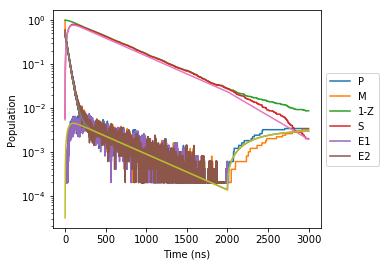

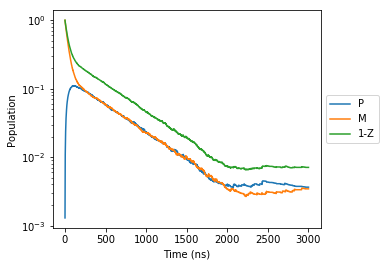

In [36]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.drive = 3
rmc.drive_time = 2000

rmc.init_state = 1
rmc.S_lifetime = 400.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([1.0,0.00,0.0,0.63,0.0,0.0])
E2_branching_raw = np.array([0.00,1.0,0.0,0.63,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 11.7/np.sum(E1_branching_raw)
rmc.E2_lifetime = 11.7/np.sum(E2_branching_raw)
rmc.S_branching = mcr.normalized([1,1,6,0,0,0])

rmc.time_duration = 3000
rmc.dt = 0.2
rmc.repetitions = 5000

rmc.run(print_end_pops = True,log_plot=True,invert_Z = True,plot_model=True)
    

In [34]:
avgRepumpTime=np.sum(rmc.t_array[:-1]*(-np.diff(rmc.mean_populations[:,3])))

print avgRepumpTime

463.29228


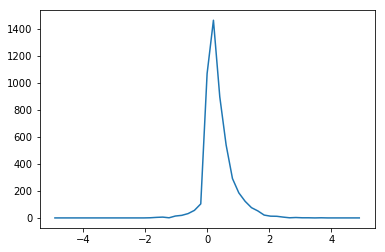

Mean phase, std dev phase:  0.36 0.44
Time in ms=-1 required to acquire mean phase (ns):  37.97


In [35]:
Apar = np.array([-365,-26,-55,33,26.5,-72])*1e3
Aperp = np.array([100,18,25,35,30,30])*1e3
Larmor = 442800.0

fp1 = (np.sqrt((Larmor + Apar)**2 + Aperp**2) - Larmor)
fm1 = (np.sqrt((Larmor - Apar)**2 + Aperp**2) - Larmor)
favg = (fp1+fm1)/2

carbon = 1

wp1=360.0*1e-9*fp1[carbon]
wm1=360.0*1e-9*fm1[carbon]

phase = np.float(rmc.dt)*np.array([wp1,wm1,0,0,wp1,wm1])
phaseAcquired = np.sum(np.dot(phase,np.transpose(rmc.populations,axes = [0,2,1])),axis=1)

h,bins =np.histogram(phaseAcquired,np.linspace(-5,5,50))
centers = bins[:-1] + (bins[1]-bins[0])/2

plt.plot(centers,h)
plt.show()
plt.close()

meanPhase = np.mean(phaseAcquired)
stdDevPhase = np.sqrt(np.var(phaseAcquired))

print 'Mean phase, std dev phase: ', np.around(meanPhase,2), np.around(stdDevPhase,2)
print 'Time in ms=-1 required to acquire mean phase (ns): ', np.around(meanPhase/wm1,2)


wm1* (35)^2*(1\tau)*exp[-t/35.0] -> wm1 tau as expected

rate of pumping out of m1 is basically 11.7/(0.5*0.63) in the limit of saturated pumping